# Prior and Posterior predictive distributions

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Exercise 1 - Modeling prior predictive distribution

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,N,y,p
0,0.0,0.0,50.0,9.0,0.167920
1,0.0,0.0,50.0,13.0,0.225322
2,0.0,0.0,50.0,12.0,0.247751
3,0.0,0.0,50.0,8.0,0.198077
4,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...
995,0.0,0.0,50.0,4.0,0.069468
996,0.0,0.0,50.0,8.0,0.304901
997,0.0,0.0,50.0,5.0,0.151250
998,0.0,0.0,50.0,13.0,0.276720


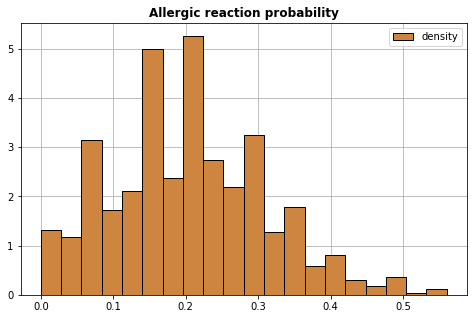

Mean of the ratio (0.20) is consistent with prior knowledge.


In [2]:
prior_predictive_dist = CmdStanModel(stan_file='code_1.stan')

# Compilation of code_1.stan and get 1000 samples
samples = prior_predictive_dist.sample(fixed_param=True, 
                                       iter_sampling=1000)

# Creation of pandas dataframe from resulting draws
df = samples.draws_pd()
display(df)

# Compute ratio of allergic reactions for each sample
ratio = df['y'] / df['N']

# Histogram for allergic reaction probability
plt.figure(figsize=(8, 5))
plt.hist(ratio, bins='auto', density=True, color='peru', edgecolor="black", zorder=3, label='density')
plt.title("Allergic reaction probability", fontweight="bold")
plt.grid(zorder=0)
plt.legend()
plt.show()

# Conclusions
print("Mean of the ratio ({:.2f}) is consistent with prior knowledge.".format(ratio.mean()))

### Exercise 2 - Modeling posterior and posterior predictive distribution

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,p,y_pred
0,0.0,0.0,0.173265,10.0
1,0.0,0.0,0.173265,5.0
2,0.0,0.0,0.173265,7.0
3,0.0,0.0,0.173265,7.0
4,0.0,0.0,0.173265,7.0
...,...,...,...,...
995,0.0,0.0,0.173265,8.0
996,0.0,0.0,0.173265,9.0
997,0.0,0.0,0.173265,5.0
998,0.0,0.0,0.173265,7.0


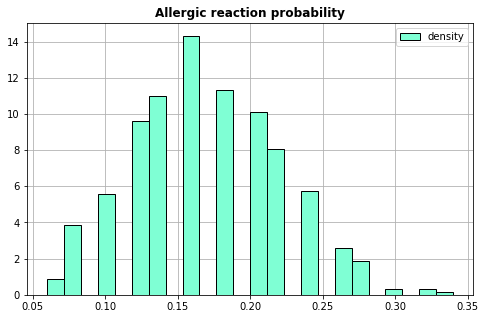

Expected value of the predicted ratio: 0.17002000000000003
94% density interval of the predicted ratio: [0.08 0.26]

Expected value of the parameter p: 0.17326499999999992
94% density interval of the parameter p: [0.173265 0.173265]

Probability that ratio is lower than the average probability from traditional vaccines: 65.9%


In [28]:
posterior_predictive_dist = CmdStanModel(stan_file='code_2.stan')

# Model parameters 
N = 50
y = 2

# Compilation of code_2.stan and get 1000 samples
samples = posterior_predictive_dist.sample(data={'N':N, 'y':y},
                                           fixed_param=True,
                                           iter_warmup=0, 
                                           chains = 1)

# Creation of pandas dataframe from resulting draws
df = samples.draws_pd()
display(df)

# Compute ratio of allergic reactions for each sample
pred_ratio = df['y_pred'] / N

# Histogram for allergic reaction probability
plt.figure(figsize=(8, 5))
plt.hist(pred_ratio, bins='auto', density=True, color='aquamarine', edgecolor="black", zorder=3, label='density')
plt.title("Allergic reaction probability", fontweight="bold")
plt.grid(zorder=0)
plt.legend()
plt.show()

# expected value of predicted ratio
expected_ratio = pred_ratio.mean()
# 94% density interval of the predicted ratio
interval_ratio = az.hdi(pred_ratio.to_numpy(), credible_interval=0.94)

print(f"Expected value of the predicted ratio: {expected_ratio}\n94% density interval of the predicted ratio: {interval_ratio}")

# expected value of parameter p
expected_p = df['p'].mean()
# 94% density interval of parameter p
interval_p = az.hdi(df['p'].to_numpy(), credible_interval=0.94)

print(f"\nExpected value of the parameter p: {expected_p}\n94% density interval of the parameter p: {interval_p}")

# Probability that ratio is lower than the average probability from traditional vaccines
avg_prob = 0.2
num_of_smaller_rations = sum((pred_ratio < avg_prob).astype('int'))
print(f"\nProbability that ratio is lower than the average probability from traditional vaccines: {num_of_smaller_rations/len(pred_ratio)*100}%")